In [1]:
# Install the necessary packages
# Uncomment this line if you haven't installed the packages
# !pip install openfermion openfermionpyscf py3Dmol

# Import necessary libraries
import numpy as np
from openfermion.ops import FermionOperator
from openfermion.transforms import jordan_wigner
from openfermionpyscf import generate_molecular_hamiltonian
from openfermion.linalg import get_sparse_operator  # Updated import for sparse operator conversion
import py3Dmol  # For molecule visualization

# Notebook setup
from IPython.display import display, Markdown

# Function to display intermediate steps in Markdown format
def display_step(step_text):
    display(Markdown(f"### {step_text}"))

# Function to visualize the H2 molecule
def visualize_h2_molecule():
    # Create a molecule object in py3Dmol
    xyz = """
    H 0.0 0.0 0.0
    H 0.0 0.0 0.74
    """
    
    # Initialize 3D view for the molecule
    view = py3Dmol.view(width=400, height=400)
    view.addModel(xyz, "xyz")  # Add the molecule in XYZ format
    view.setStyle({'stick': {}})  # Show sticks for bonds
    view.zoomTo()  # Auto-zoom to fit the molecule in the view
    return view

# Step 1: Define the H2 molecule geometry and basis set
display_step("Step 1: Define the H₂ molecule geometry and basis set")
geometry = [('H', (0, 0, 0)), ('H', (0, 0, 0.74))]  # Bond distance ~0.74 Å
basis = 'sto-3g'  # Minimal basis set
multiplicity = 1  # Singlet state (closed shell)
charge = 0  # Neutral H₂ molecule

display_step(f"Defined geometry: {geometry}\nUsing basis: {basis}")

# Visualize the H₂ molecule
display_step("Step 2: Visualize the H₂ molecule geometry")

# Show molecule in Jupyter notebook
view = visualize_h2_molecule()
view.show()

# Step 3: Generate the molecular Hamiltonian
display_step("Step 3: Generate the molecular Hamiltonian using OpenFermion")

molecular_hamiltonian = generate_molecular_hamiltonian(geometry, basis, multiplicity, charge)
fermionic_hamiltonian = molecular_hamiltonian

# Display the molecular Hamiltonian in FermionOperator form
display_step("Generated Fermionic Hamiltonian:")
print(fermionic_hamiltonian)

# Step 4: Jordan-Wigner Transformation
display_step("Step 4: Apply the Jordan-Wigner transformation")

jw_hamiltonian = jordan_wigner(fermionic_hamiltonian)

# Display the Jordan-Wigner transformed Hamiltonian
display_step("Jordan-Wigner Transformed Hamiltonian (Pauli Operators):")
print(jw_hamiltonian)

# Step 5: Convert to a sparse matrix for further simulation
display_step("Step 5: Convert the Hamiltonian to a sparse matrix form for further simulation")

jw_sparse_hamiltonian = get_sparse_operator(jw_hamiltonian)  # Using the updated sparse operator method
print(jw_sparse_hamiltonian)


### Step 1: Define the H₂ molecule geometry and basis set

### Defined geometry: [('H', (0, 0, 0)), ('H', (0, 0, 0.74))]
Using basis: sto-3g

### Step 2: Visualize the H₂ molecule geometry

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Step 3: Generate the molecular Hamiltonian using OpenFermion

### Generated Fermionic Hamiltonian:

() 0.7151043390810812
((0, 1), (0, 0)) -1.2533097866459773
((1, 1), (1, 0)) -1.2533097866459773
((2, 1), (2, 0)) -0.47506884877217775
((3, 1), (3, 0)) -0.47506884877217775
((0, 1), (0, 1), (0, 0), (0, 0)) 0.3373779634072241
((0, 1), (0, 1), (2, 0), (2, 0)) 0.09060523100759851
((0, 1), (1, 1), (1, 0), (0, 0)) 0.3373779634072241
((0, 1), (1, 1), (3, 0), (2, 0)) 0.09060523100759851
((0, 1), (2, 1), (0, 0), (2, 0)) 0.09060523100759851
((0, 1), (2, 1), (2, 0), (0, 0)) 0.33185570067540676
((0, 1), (3, 1), (1, 0), (2, 0)) 0.09060523100759851
((0, 1), (3, 1), (3, 0), (0, 0)) 0.33185570067540676
((1, 1), (0, 1), (0, 0), (1, 0)) 0.3373779634072241
((1, 1), (0, 1), (2, 0), (3, 0)) 0.09060523100759851
((1, 1), (1, 1), (1, 0), (1, 0)) 0.3373779634072241
((1, 1), (1, 1), (3, 0), (3, 0)) 0.09060523100759851
((1, 1), (2, 1), (0, 0), (3, 0)) 0.09060523100759851
((1, 1), (2, 1), (2, 0), (1, 0)) 0.33185570067540676
((1, 1), (3, 1), (1, 0), (3, 0)) 0.09060523100759851
((1, 1), (3, 1), (3, 0), (1, 0)) 0.33

### Step 4: Apply the Jordan-Wigner transformation

### Jordan-Wigner Transformed Hamiltonian (Pauli Operators):

-0.09706626816763103 [] +
-0.04530261550379926 [X0 X1 Y2 Y3] +
0.04530261550379926 [X0 Y1 Y2 X3] +
0.04530261550379926 [Y0 X1 X2 Y3] +
-0.04530261550379926 [Y0 Y1 X2 X3] +
0.17141282644776915 [Z0] +
0.16868898170361205 [Z0 Z1] +
0.12062523483390411 [Z0 Z2] +
0.16592785033770338 [Z0 Z3] +
0.1714128264477691 [Z1] +
0.16592785033770338 [Z1 Z2] +
0.12062523483390411 [Z1 Z3] +
-0.22343153690813436 [Z2] +
0.17441287612261575 [Z2 Z3] +
-0.22343153690813436 [Z3]


### Step 5: Convert the Hamiltonian to a sparse matrix form for further simulation

<Compressed Sparse Column sparse matrix of dtype 'complex128'
	with 20 stored elements and shape (16, 16)>
  Coords	Values
  (0, 0)	(0.7151043390810812+0j)
  (1, 1)	(0.24003549030890353+0j)
  (2, 2)	(0.24003549030890353+0j)
  (3, 3)	(0.4626181460271887+0j)
  (12, 3)	(0.18121046201519703+0j)
  (4, 4)	(-0.5382054475648959+0j)
  (5, 5)	(-0.5307733570014572+0j)
  (6, 6)	(-0.34956289498626014+0j)
  (9, 6)	(-0.18121046201519703+0j)
  (7, 7)	(0.35552070006764147+0j)
  (8, 8)	(-0.5382054475648961+0j)
  (6, 9)	(-0.18121046201519703+0j)
  (9, 9)	(-0.34956289498626036+0j)
  (10, 10)	(-0.5307733570014574+0j)
  (11, 11)	(0.35552070006764125+0j)
  (3, 12)	(0.18121046201519703+0j)
  (12, 12)	(-1.116759307396425+0j)
  (13, 13)	(-0.44561581548217305+0j)
  (14, 14)	(-0.44561581548217305+0j)
  (15, 15)	(0.9231791809225423+0j)


converged SCF energy = -0.593827758535727
converged SCF energy = -0.731352722025651
converged SCF energy = -0.834474063581438
converged SCF energy = -0.912457217890258
converged SCF energy = -0.971623756036452
converged SCF energy = -1.01641612763003
converged SCF energy = -1.05003897763102
converged SCF energy = -1.07486102487998
converged SCF energy = -1.09267372408286
converged SCF energy = -1.10486057111418
converged SCF energy = -1.11250917170902
converged SCF energy = -1.11648626650101
converged SCF energy = -1.11748885730854
converged SCF energy = -1.11608009648701
converged SCF energy = -1.11271558249226
converged SCF energy = -1.10776361726706
converged SCF energy = -1.10152154905598
converged SCF energy = -1.09422938179007
converged SCF energy = -1.08608125700712
converged SCF energy = -1.07723510358347
converged SCF energy = -1.06782061595603
converged SCF energy = -1.05794569058479
converged SCF energy = -1.04770146868534
converged SCF energy = -1.03716616422834
converged S

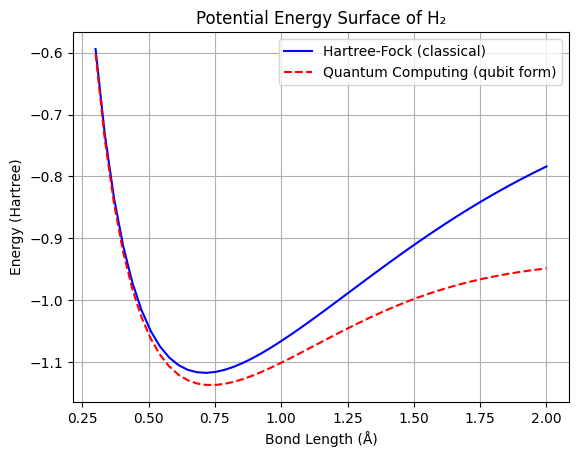

In [3]:
# Install necessary packages
# Uncomment this line if you haven't installed the packages
# !pip install openfermion openfermionpyscf pyscf scipy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from openfermionpyscf import generate_molecular_hamiltonian
from openfermion.transforms import jordan_wigner
from openfermion.linalg import get_ground_state, get_sparse_operator
from pyscf import scf, gto
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as pylab

# Define a function to compute the Hartree-Fock energy of H2
def compute_h2_hf_energy(bond_length_angstrom, basis='sto-3g'):
    # Define the geometry of the H2 molecule in PySCF
    mol = gto.M(atom=f'H 0 0 0; H 0 0 {bond_length_angstrom}', basis=basis, unit='angstrom')
    
    # Perform the Hartree-Fock calculation
    mol = mol.build()
    mf = scf.RHF(mol)
    hf_energy = mf.kernel()
    
    return hf_energy

# Define a function to compute the quantum computing energy of H2
def compute_h2_quantum_energy(bond_length_angstrom, basis='sto-3g'):
    # Use OpenFermion and PySCF to generate the molecular Hamiltonian
    geometry = [('H', (0, 0, 0)), ('H', (0, 0, bond_length_angstrom))]
    molecular_hamiltonian = generate_molecular_hamiltonian(geometry, basis, multiplicity=1, charge=0)

    # Transform the Hamiltonian into qubit form using the Jordan-Wigner transformation
    qubit_hamiltonian = jordan_wigner(molecular_hamiltonian)

    # Convert to a sparse matrix
    sparse_hamiltonian = get_sparse_operator(qubit_hamiltonian)

    # Find the ground state energy by diagonalizing the sparse Hamiltonian
    # We use the 'eigsh' function to find the lowest eigenvalue
    energy, _ = eigsh(sparse_hamiltonian, k=1, which='SA')  # SA: smallest algebraic eigenvalue

    return energy[0]

# Define a range of bond lengths in angstroms
bond_lengths = np.linspace(0.3, 2.0, 50)  # Bond lengths from 0.3 to 2.0 Å
hf_energies = []
quantum_energies = []

# Loop over the bond lengths and compute the energies using both methods
for bond_length in bond_lengths:
    # Hartree-Fock energy
    hf_energy = compute_h2_hf_energy(bond_length)
    hf_energies.append(hf_energy)
    
    # Quantum computing energy
    quantum_energy = compute_h2_quantum_energy(bond_length)
    quantum_energies.append(quantum_energy)

# Convert the energies to NumPy arrays for easier plotting
hf_energies = np.array(hf_energies)
quantum_energies = np.array(quantum_energies)

# Plot the potential energy surfaces
plt.plot(bond_lengths, hf_energies, label="Hartree-Fock (classical)", color='blue')
plt.plot(bond_lengths, quantum_energies, label="Quantum Computing (qubit form)", color='red', linestyle='dashed')
plt.xlabel('Bond Length (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Potential Energy Surface of H₂')

# Save the plot to a PDF file
pylab.savefig('H2.pdf', format='pdf')

plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Install qiskit if not installed
# Uncomment this line if you haven't installed the packages
# !pip install qiskit qiskit-aer

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # Import the AerSimulator from the latest version
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer.library import SaveStatevector

# Title of the notebook
from IPython.display import display, Markdown
display(Markdown("# Trotterized Evolution and Quantum Simulation of H₂ Molecule"))

# --- Theory ---
display(Markdown("## 1. Theory: Trotterized Evolution of Quantum Systems"))

display(Markdown(r"""
The **Trotter-Suzuki decomposition** is a method used in quantum computing to approximate the time evolution of a quantum system when its Hamiltonian is composed of multiple non-commuting terms. 

For a Hamiltonian \( H \) that can be written as a sum of non-commuting terms:
\[
H = H_1 + H_2 + H_3 + \dots
\]
the exact time evolution operator is given by:
\[
U(t) = e^{-iHt}
\]

However, since the terms \( H_1, H_2, \dots \) do not commute, directly applying the time evolution operator is difficult. Instead, we can approximate it by breaking it down into smaller steps. This is known as **Trotterization**.

The first-order Trotter decomposition approximates the time evolution as:
\[
e^{-iHt} \approx \left(e^{-iH_1 \Delta t} e^{-iH_2 \Delta t} \dots \right)^n
\]
where \( \Delta t = \frac{t}{n} \) and \( n \) is the number of Trotter steps. The higher the value of \( n \), the better the approximation becomes.

### Application to Quantum Simulation
For the hydrogen molecule, the Hamiltonian is typically composed of Pauli operators such as \( Z, X, ZZ, XX \). Using the Trotter-Suzuki method, we decompose the evolution of the molecule's Hamiltonian into a series of quantum gates, which can be implemented on a quantum computer.
"""))

# --- Quantum Circuit ---
display(Markdown("## 2. Implementation of Trotterized Evolution for Hydrogen Molecule"))

display(Markdown(r"""
In this section, we implement the Trotterized evolution for the hydrogen molecule \( H_2 \). The Hamiltonian for \( H_2 \) can be expressed as a sum of Pauli terms:
\[
H = c_0 I + c_1 Z_0 + c_2 Z_1 + c_3 Z_0 Z_1 + c_4 X_0 X_1
\]
where \( Z_0, Z_1 \) are Pauli-Z operators, \( X_0, X_1 \) are Pauli-X operators, and \( c_0, c_1, \dots \) are coefficients determined by the molecule's interactions.

Using the Trotter-Suzuki decomposition, we approximate the evolution of this Hamiltonian over time by sequentially applying the evolution for each individual Pauli term.
"""))

# Define the Trotterized evolution circuit
def trotterized_h2_circuit(t, n):
    """
    t: time to evolve
    n: number of trotter steps
    Returns a quantum circuit for the trotterized time evolution of the H2 Hamiltonian.
    """
    qc = QuantumCircuit(2)
    
    # Time step for each Trotter step
    delta_t = t / n
    
    # Hamiltonian coefficients (example values for H2)
    c0 = 0.5   # I term
    c1 = -1.0  # Z_0 term
    c2 = -1.0  # Z_1 term
    c3 = 0.5   # Z_0 Z_1 term
    c4 = 0.1   # X_0 X_1 term
    
    # Trotterize the Hamiltonian: Apply evolution for each term in the Hamiltonian
    for _ in range(n):
        # Apply Z_0 evolution: exp(-i * c1 * Z_0 * delta_t)
        qc.rz(2 * c1 * delta_t, 0)
        
        # Apply Z_1 evolution: exp(-i * c2 * Z_1 * delta_t)
        qc.rz(2 * c2 * delta_t, 1)
        
        # Apply Z_0 Z_1 evolution: exp(-i * c3 * Z_0 Z_1 * delta_t)
        qc.cx(0, 1)
        qc.rz(2 * c3 * delta_t, 1)
        qc.cx(0, 1)
        
        # Apply X_0 X_1 evolution: exp(-i * c4 * X_0 X_1 * delta_t)
        qc.h(0)
        qc.h(1)
        qc.cx(0, 1)
        qc.rz(2 * c4 * delta_t, 1)
        qc.cx(0, 1)
        qc.h(0)
        qc.h(1)
    
    # Save the statevector at the end of the circuit
    qc.save_statevector()

    # Return the quantum circuit
    return qc

# Define parameters for the simulation
t = 1.0   # Total time for evolution
n = 5     # Number of Trotter steps

# Create the Trotterized circuit
qc = trotterized_h2_circuit(t, n)

# Draw the quantum circuit
display(Markdown("### Generated Quantum Circuit for Trotterized Evolution"))
qc.draw(output='mpl')

# --- Quantum Simulation ---
display(Markdown("## 3. Simulating the Quantum Circuit"))

display(Markdown(r"""
Now that we have constructed the quantum circuit for the Trotterized evolution of the hydrogen molecule, we will use **Qiskit's AerSimulator** to simulate the final quantum state (statevector). This will give us the result of the Trotterized evolution at the chosen time \( t \).
"""))

# Use the AerSimulator for simulation
simulator = AerSimulator()

# Transpile the circuit for the AerSimulator backend
qc_sim = transpile(qc, simulator)

# Run the simulation and get the result (ensure statevector is requested)
result = simulator.run(qc_sim).result()

# Get the statevector after the simulation
statevector = result.get_statevector()

# Display the statevector
display(Markdown("### Final Statevector after Trotterized Evolution"))
print("Final statevector:")
print(statevector)

# Visualize the final statevector (real and imaginary parts)
display(Markdown("### Visualization of the Final Statevector"))
statevector_real = np.real(statevector)
statevector_imag = np.imag(statevector)
plt.bar(range(len(statevector_real)), statevector_real, color='b', alpha=0.7, label='Real')
plt.bar(range(len(statevector_imag)), statevector_imag, color='r', alpha=0.7, label='Imaginary')
plt.legend()
plt.title('Statevector Components After Trotterized Evolution')
plt.show()

# --- Conclusion ---
display(Markdown("## 4. Conclusion"))

display(Markdown(r"""
In this notebook, we have explored the theory behind **Trotterized evolution** and implemented it for the hydrogen molecule using quantum gates. We constructed a quantum circuit that simulates the time evolution of the molecular Hamiltonian and used **Qiskit's AerSimulator** to simulate the final quantum state.

The **Trotter-Suzuki decomposition** allows us to approximate the evolution of a complex Hamiltonian by decomposing it into smaller terms, which can be implemented using standard quantum gates. This method is widely used in quantum simulations for chemistry and materials science.
"""))


In [ ]:
# Install qiskit if not installed
# Uncomment this line if you haven't installed the packages
# !pip install qiskit qiskit-aer

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # Import the AerSimulator from the latest version
from qiskit.visualization import circuit_drawer

# Function to create the Trotterized evolution circuit for the hydrogen molecule
def trotterized_h2_circuit(t, n):
    """
    t: time to evolve
    n: number of trotter steps
    Returns a quantum circuit for the trotterized time evolution of the H2 Hamiltonian.
    """
    qc = QuantumCircuit(2)
    
    # Time step for each Trotter step
    delta_t = t / n
    
    # Hamiltonian coefficients (example values for H2)
    c0 = 0.5   # I term
    c1 = -1.0  # Z_0 term
    c2 = -1.0  # Z_1 term
    c3 = 0.5   # Z_0 Z_1 term
    c4 = 0.1   # X_0 X_1 term
    
    # Trotterize the Hamiltonian: Apply evolution for each term in the Hamiltonian
    for _ in range(n):
        # Apply Z_0 evolution: exp(-i * c1 * Z_0 * delta_t)
        qc.rz(2 * c1 * delta_t, 0)
        
        # Apply Z_1 evolution: exp(-i * c2 * Z_1 * delta_t)
        qc.rz(2 * c2 * delta_t, 1)
        
        # Apply Z_0 Z_1 evolution: exp(-i * c3 * Z_0 Z_1 * delta_t)
        qc.cx(0, 1)
        qc.rz(2 * c3 * delta_t, 1)
        qc.cx(0, 1)
        
        # Apply X_0 X_1 evolution: exp(-i * c4 * X_0 X_1 * delta_t)
        qc.h(0)
        qc.h(1)
        qc.cx(0, 1)
        qc.rz(2 * c4 * delta_t, 1)
        qc.cx(0, 1)
        qc.h(0)
        qc.h(1)
    
    # Save the statevector at the end of the circuit
    qc.save_statevector()

    # Return the quantum circuit
    return qc

# Define parameters for the simulation
t = 1.0   # Total time for evolution
n = 5     # Number of Trotter steps

# Create the Trotterized circuit
qc = trotterized_h2_circuit(t, n)

# Draw the quantum circuit
qc.draw(output='mpl')


# Quantum Circuit Construction and PES Calculation for H₂ Molecule with Pauli Matrices

## 1. Molecular Hamiltonian and Jordan-Wigner Transformation


The hydrogen molecule \( H_2 \) can be described by a molecular Hamiltonian derived from quantum chemistry. The molecular Hamiltonian is expressed in terms of fermionic creation and annihilation operators.

To simulate this Hamiltonian on a quantum computer, we first use the **Jordan-Wigner transformation** to map the fermionic operators to qubit operators (Pauli matrices such as \( X, Y, Z \)).

This allows us to express the molecular Hamiltonian as a sum of Pauli terms that can be directly implemented using quantum gates.


### Generated H₂ Hamiltonian at bond length 0.74 Å

() 0.7151043390810812
((0, 1), (0, 0)) -1.2533097866459773
((1, 1), (1, 0)) -1.2533097866459773
((2, 1), (2, 0)) -0.47506884877217775
((3, 1), (3, 0)) -0.47506884877217775
((0, 1), (0, 1), (0, 0), (0, 0)) 0.3373779634072241
((0, 1), (0, 1), (2, 0), (2, 0)) 0.09060523100759851
((0, 1), (1, 1), (1, 0), (0, 0)) 0.3373779634072241
((0, 1), (1, 1), (3, 0), (2, 0)) 0.09060523100759851
((0, 1), (2, 1), (0, 0), (2, 0)) 0.09060523100759851
((0, 1), (2, 1), (2, 0), (0, 0)) 0.33185570067540676
((0, 1), (3, 1), (1, 0), (2, 0)) 0.09060523100759851
((0, 1), (3, 1), (3, 0), (0, 0)) 0.33185570067540676
((1, 1), (0, 1), (0, 0), (1, 0)) 0.3373779634072241
((1, 1), (0, 1), (2, 0), (3, 0)) 0.09060523100759851
((1, 1), (1, 1), (1, 0), (1, 0)) 0.3373779634072241
((1, 1), (1, 1), (3, 0), (3, 0)) 0.09060523100759851
((1, 1), (2, 1), (0, 0), (3, 0)) 0.09060523100759851
((1, 1), (2, 1), (2, 0), (1, 0)) 0.33185570067540676
((1, 1), (3, 1), (1, 0), (3, 0)) 0.09060523100759851
((1, 1), (3, 1), (3, 0), (1, 0)) 0.33

## 2. Jordan-Wigner Transformation


The **Jordan-Wigner transformation** maps the fermionic creation and annihilation operators to qubit operators. This allows us to represent the molecular Hamiltonian in terms of Pauli matrices, which can be implemented on quantum computers.


### Jordan-Wigner Transformed Hamiltonian

-0.09706626816763103 [] +
-0.04530261550379926 [X0 X1 Y2 Y3] +
0.04530261550379926 [X0 Y1 Y2 X3] +
0.04530261550379926 [Y0 X1 X2 Y3] +
-0.04530261550379926 [Y0 Y1 X2 X3] +
0.17141282644776915 [Z0] +
0.16868898170361205 [Z0 Z1] +
0.12062523483390411 [Z0 Z2] +
0.16592785033770338 [Z0 Z3] +
0.1714128264477691 [Z1] +
0.16592785033770338 [Z1 Z2] +
0.12062523483390411 [Z1 Z3] +
-0.22343153690813436 [Z2] +
0.17441287612261575 [Z2 Z3] +
-0.22343153690813436 [Z3]


## 3. Quantum Circuit Construction with Pauli Matrices


Each term in the transformed Hamiltonian corresponds to Pauli matrices like \( X, Y, Z \). These Pauli terms are implemented as quantum gates in the circuit:
- \( X \): Corresponds to the **Hadamard gate (H)** followed by other rotations.
- \( Y \): Is implemented as the **S† gate** followed by a **Hadamard gate**.
- \( Z \): Is a phase flip and does not require an additional gate.


### Generated Quantum Circuit Corresponding to Pauli Matrices

## 4. Optimizing the Quantum Circuit


We now optimize the quantum circuit by reducing the number of gates and eliminating unnecessary operations. Optimizing the circuit improves performance when running on actual quantum hardware.


### Optimized Quantum Circuit

## 5. Potential Energy Surface Calculation


We now calculate the **Potential Energy Surface (PES)** of the hydrogen molecule by evaluating the energy at different bond lengths.

We will extract the energy eigenvalues for different bond lengths and plot the PES.


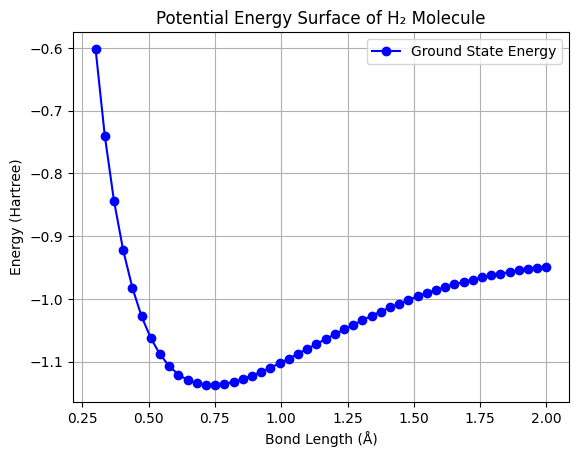

## 6. Conclusion


In this notebook, we have demonstrated how to:
1. **Generate the molecular Hamiltonian** for the hydrogen molecule using **OpenFermion**.
2. **Apply the Jordan-Wigner transformation** to map the fermionic Hamiltonian to qubit operators.
3. **Construct and optimize the quantum circuit** for simulating the hydrogen molecule, including visualization of quantum gates corresponding to the Pauli matrices \( X, Y, Z \).
4. **Calculate the Potential Energy Surface (PES)** of the hydrogen molecule by evaluating the ground state energy at different bond lengths.

This process shows how quantum algorithms can be used to simulate molecular systems, with applications in quantum chemistry and materials science.


In [5]:
# Install necessary packages
# Uncomment this line if you haven't installed the packages
# !pip install openfermion openfermionpyscf qiskit qiskit-aer matplotlib

from openfermionpyscf import generate_molecular_hamiltonian
from openfermion.transforms import jordan_wigner
from openfermion.linalg import get_sparse_operator
from scipy.sparse.linalg import eigsh
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # Updated for the latest version
from qiskit.visualization import circuit_drawer
import numpy as np
import matplotlib.pyplot as plt

# Title of the notebook
from IPython.display import display, Markdown
display(Markdown("# Quantum Circuit Construction and PES Calculation for H₂ Molecule with Pauli Matrices"))

# --- Theory: Molecular Hamiltonian and Jordan-Wigner Transformation ---
display(Markdown("## 1. Molecular Hamiltonian and Jordan-Wigner Transformation"))

display(Markdown("""
The hydrogen molecule \( H_2 \) can be described by a molecular Hamiltonian derived from quantum chemistry. The molecular Hamiltonian is expressed in terms of fermionic creation and annihilation operators.

To simulate this Hamiltonian on a quantum computer, we first use the **Jordan-Wigner transformation** to map the fermionic operators to qubit operators (Pauli matrices such as \( X, Y, Z \)).

This allows us to express the molecular Hamiltonian as a sum of Pauli terms that can be directly implemented using quantum gates.
"""))

# Define the geometry of the H2 molecule and create the molecular Hamiltonian
def generate_h2_hamiltonian(bond_length):
    geometry = [('H', (0, 0, 0)), ('H', (0, 0, bond_length))]  # Bond length in Å
    basis = 'sto-3g'  # Minimal basis set
    multiplicity = 1  # Singlet state
    charge = 0  # Neutral molecule
    
    # Generate the molecular Hamiltonian using OpenFermion-PySCF
    molecular_hamiltonian = generate_molecular_hamiltonian(geometry, basis, multiplicity, charge)
    
    return molecular_hamiltonian

# Example: generate the H2 Hamiltonian at bond length 0.74 Å (equilibrium distance)
bond_length = 0.74
h2_hamiltonian = generate_h2_hamiltonian(bond_length)

display(Markdown(f"### Generated H₂ Hamiltonian at bond length {bond_length} Å"))
print(h2_hamiltonian)

# --- Jordan-Wigner Transformation ---
display(Markdown("## 2. Jordan-Wigner Transformation"))

display(Markdown("""
The **Jordan-Wigner transformation** maps the fermionic creation and annihilation operators to qubit operators. This allows us to represent the molecular Hamiltonian in terms of Pauli matrices, which can be implemented on quantum computers.
"""))

# Apply the Jordan-Wigner transformation to the Hamiltonian
jw_hamiltonian = jordan_wigner(h2_hamiltonian)

display(Markdown("### Jordan-Wigner Transformed Hamiltonian"))
print(jw_hamiltonian)

# --- Quantum Circuit Construction ---
display(Markdown("## 3. Quantum Circuit Construction with Pauli Matrices"))

display(Markdown("""
Each term in the transformed Hamiltonian corresponds to Pauli matrices like \( X, Y, Z \). These Pauli terms are implemented as quantum gates in the circuit:
- \( X \): Corresponds to the **Hadamard gate (H)** followed by other rotations.
- \( Y \): Is implemented as the **S† gate** followed by a **Hadamard gate**.
- \( Z \): Is a phase flip and does not require an additional gate.
"""))

# Create a function to construct the quantum circuit from the Jordan-Wigner transformed Hamiltonian
def create_hamiltonian_circuit(jw_hamiltonian):
    qc = QuantumCircuit(4)  # Define a 4-qubit circuit (H2 molecule)
    
    # Extract the terms and coefficients from the Hamiltonian
    for term, coefficient in jw_hamiltonian.terms.items():
        # Each term is a tuple of Pauli operators (e.g., ('X0', 'Z1'))
        if term == ():
            continue  # Skip identity term
        
        # Apply the corresponding gates for each Pauli term
        for qubit, op in term:
            if qubit >= 4:
                raise ValueError(f"Qubit index {qubit} is out of range for this circuit.")
            
            if op == 'X':
                qc.h(qubit)  # Apply Hadamard for Pauli-X
            elif op == 'Y':
                qc.sdg(qubit)  # Apply S† for Pauli-Y
                qc.h(qubit)  # Then apply Hadamard for Y
            elif op == 'Z':
                pass  # Z is just a phase flip, no additional gates needed
        
        # Apply the rotation gate corresponding to the coefficient
        qc.rz(2 * coefficient, qubit)
    
    return qc

# Generate the quantum circuit
h2_circuit = create_hamiltonian_circuit(jw_hamiltonian)

# Draw the quantum circuit
display(Markdown("### Generated Quantum Circuit Corresponding to Pauli Matrices"))
h2_circuit.draw(output='mpl')

# --- Optimize the Quantum Circuit ---
display(Markdown("## 4. Optimizing the Quantum Circuit"))

display(Markdown("""
We now optimize the quantum circuit by reducing the number of gates and eliminating unnecessary operations. Optimizing the circuit improves performance when running on actual quantum hardware.
"""))

# Transpile and optimize the circuit for the AerSimulator backend
simulator = AerSimulator()
h2_circuit_opt = transpile(h2_circuit, simulator)

# Draw the optimized circuit
display(Markdown("### Optimized Quantum Circuit"))
h2_circuit_opt.draw(output='mpl')

# --- Potential Energy Surface (PES) Calculation ---
display(Markdown("## 5. Potential Energy Surface Calculation"))

display(Markdown("""
We now calculate the **Potential Energy Surface (PES)** of the hydrogen molecule by evaluating the energy at different bond lengths.

We will extract the energy eigenvalues for different bond lengths and plot the PES.
"""))

# Function to compute the ground state energy using the Jordan-Wigner transformed Hamiltonian
def compute_ground_state_energy(jw_hamiltonian):
    sparse_hamiltonian = get_sparse_operator(jw_hamiltonian)
    
    # Compute the ground state energy (smallest eigenvalue) using sparse matrix diagonalization
    energy, _ = eigsh(sparse_hamiltonian, k=1, which='SA')
    
    return energy[0]

# Define a range of bond lengths and compute the ground state energy for each length
bond_lengths = np.linspace(0.3, 2.0, 50)  # Bond lengths from 0.3 Å to 2.0 Å
energies = []

for bond_length in bond_lengths:
    h2_hamiltonian = generate_h2_hamiltonian(bond_length)
    jw_hamiltonian = jordan_wigner(h2_hamiltonian)
    energy = compute_ground_state_energy(jw_hamiltonian)
    energies.append(energy)

# Plot the Potential Energy Surface (PES)
plt.plot(bond_lengths, energies, marker='o', color='b', label="Ground State Energy")
plt.xlabel("Bond Length (Å)")
plt.ylabel("Energy (Hartree)")
plt.title("Potential Energy Surface of H₂ Molecule")
plt.grid(True)
plt.legend()
plt.show()

# --- Conclusion ---
display(Markdown("## 6. Conclusion"))

display(Markdown("""
In this notebook, we have demonstrated how to:
1. **Generate the molecular Hamiltonian** for the hydrogen molecule using **OpenFermion**.
2. **Apply the Jordan-Wigner transformation** to map the fermionic Hamiltonian to qubit operators.
3. **Construct and optimize the quantum circuit** for simulating the hydrogen molecule, including visualization of quantum gates corresponding to the Pauli matrices \( X, Y, Z \).
4. **Calculate the Potential Energy Surface (PES)** of the hydrogen molecule by evaluating the ground state energy at different bond lengths.

This process shows how quantum algorithms can be used to simulate molecular systems, with applications in quantum chemistry and materials science.
"""))
